# Passo 1

In [873]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [874]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [998]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_excel("PredDolarInv3.xlsx")
dol

,Data,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf
0,2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85
1,2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68
2,2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32
3,2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58
4,2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86
...,...,...,...,...,...,...,...
1890,2021-08-24,5370.00,5370.50,5251.00,5257.00,5426.34,5098.23
1891,2021-08-25,5270.00,5275.00,5210.00,5217.50,5422.00,5110.25
1892,2021-08-26,5226.00,5270.50,5220.50,5269.50,5410.59,5138.61
1893,2021-08-27,5257.00,5263.50,5189.50,5203.00,5411.53,5134.67


In [999]:
per = 1

#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(per)
dol["Retorno-1"] = dol["Retorno"].shift(1)
dol["Retorno-2"] = dol["Retorno-1"].shift(1)
dol["Retorno-3"] = dol["Retorno-2"].shift(1) 
dol["Retorno-4"] = dol["Retorno-3"].shift(1)
dol["Retorno-5"] = dol["Retorno-4"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll10"] = dol["DistBoll"].rolling(10).mean()
#dol["MMDistBoll10"] = pd.qcut(dol["MMDistBoll10"], 10, labels = False)
dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)
dol["DistBoll-4"] = dol["DistBoll"].shift(4)
dol["DistBoll-5"] = dol["DistBoll"].shift(5)

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std10"] = dol["Fechamento"].rolling(10).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])
#dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["prop-1"] = dol["prop"].shift(1)
dol["prop-2"] = dol["prop"].shift(2)
dol["prop-3"] = dol["prop"].shift(3)
dol["prop-4"] = dol["prop"].shift(4)
dol["prop-5"] = dol["prop"].shift(5)

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], 1, 0)
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)
dol["dirD-4"] = dol["dirD"].shift(4)
dol["dirD-5"] = dol["dirD"].shift(5)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()
# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)
dol["zscore-4"] = dol["zscore"].shift(4)
dol["zscore-5"] = dol["zscore"].shift(5)
# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1
dol["RSL-1"] = dol["RSL"].shift(1)
dol["RSL-2"] = dol["RSL"].shift(2)
dol["RSL-3"] = dol["RSL"].shift(3)
dol["RSL-4"] = dol["RSL"].shift(4)
dol["RSL-5"] = dol["RSL"].shift(5)
#dol["RSL-6"] = dol["RSL"].shift(6)
#dol["RSL-7"] = dol["RSL"].shift(7)
#dol["RSL-8"] = dol["RSL"].shift(8)
#dol["RSL-9"] = dol["RSL"].shift(9)
#dol["RSL-10"] = dol["RSL"].shift(10)

#dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
#dol["Pips-1"] = dol["Pips"].shift(1)
#dol["Pips-2"] = dol["Pips"].shift(2)
#dol["Pips-3"] = dol["Pips"].shift(3)


#dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
#dol["std5"] = dol["std5"]*9/10+1
#dol["std10"] = pd.qcut(dol["std10"], 10, labels = False)
#dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)

In [1000]:
dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()
dol = dol.set_index("Data")
dol.head()

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,Alvo,Retorno,Retorno-1,Retorno-2,...,zscore-2,zscore-3,zscore-4,zscore-5,RSL,RSL-1,RSL-2,RSL-3,RSL-4,RSL-5
Data,,,,,,,,,,,,,,,,,,,,,
2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68,1,-0.004572,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32,0,0.001044,-0.004572,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58,1,-0.003546,0.001044,-0.004572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86,0,0.009630,-0.003546,0.001044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1001]:
dol = dol.drop(["Abertura", "Fechamento", "Mínima", "Máxima", "MM", "std15"], axis = 1)
dol.columns

Index(['BollingerSup', 'BollingerInf', 'Alvo', 'Retorno', 'Retorno-1',
       'Retorno-2', 'Retorno-3', 'Retorno-4', 'Retorno-5', 'DistBoll',
       'MMDistBoll10', 'DistBoll-1', 'DistBoll-2', 'DistBoll-3', 'DistBoll-4',
       'DistBoll-5', 'std5', 'std10', 'prop', 'prop-1', 'prop-2', 'prop-3',
       'prop-4', 'prop-5', 'dirD', 'dirD-1', 'dirD-2', 'dirD-3', 'dirD-4',
       'dirD-5', 'zscore', 'zscore-1', 'zscore-2', 'zscore-3', 'zscore-4',
       'zscore-5', 'RSL', 'RSL-1', 'RSL-2', 'RSL-3', 'RSL-4', 'RSL-5'],
      dtype='object')

In [1002]:
dol = dol.dropna(axis=0)
dol.isna().sum().sum()

0

In [1020]:
# Treinamento de 2017 a 2020.1
sTrain = "2014-02-12"
eTrain = "2017-12-31"
# Teste de 2020.2 até agora 
sTest = "2018-01-01"
eTest = "2021-08-31"


dolTrain = dol[sTrain : eTrain]
dolTest = dol[sTest : eTest]
print(dolTrain.shape)
print(dolTest.shape)

(960, 45)
(906, 45)


In [1021]:
xTrain = dolTrain.drop("Alvo", axis = 1)
yTrain = dolTrain["Alvo"]

xTest = dolTest.drop("Alvo", axis = 1)
yTest = dolTest["Alvo"]

In [1022]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), max_iter = 500,
                   solver = "sgd", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh")

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 0.70178043
Iteration 2, loss = 0.70108944
Iteration 3, loss = 0.70079575
Iteration 4, loss = 0.70111382
Iteration 5, loss = 0.69851229
Iteration 6, loss = 0.69869802
Iteration 7, loss = 0.69833279
Iteration 8, loss = 0.69786310
Iteration 9, loss = 0.69757763
Iteration 10, loss = 0.69803663
Iteration 11, loss = 0.69861118
Iteration 12, loss = 0.69695578
Iteration 13, loss = 0.69721002
Iteration 14, loss = 0.69470378
Iteration 15, loss = 0.69336463
Iteration 16, loss = 0.69371121
Iteration 17, loss = 0.69373760
Iteration 18, loss = 0.69330091
Iteration 19, loss = 0.69339313
Iteration 20, loss = 0.69574083
Iteration 21, loss = 0.69371835
Iteration 22, loss = 0.69304464
Iteration 23, loss = 0.69336187
Iteration 24, loss = 0.69289919
Iteration 25, loss = 0.69270570
Iteration 26, loss = 0.69243285
Iteration 27, loss = 0.69272860
Iteration 28, loss = 0.69294786
Iteration 29, loss = 0.69305479
Iteration 30, loss = 0.69309637
Iteration 31, loss = 0.69295151
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=500,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [1023]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [1024]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[478  22]
 [442  18]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.52      0.96      0.67       500
           1       0.45      0.04      0.07       460

    accuracy                           0.52       960
   macro avg       0.48      0.50      0.37       960
weighted avg       0.49      0.52      0.39       960


Acurácia:  51.667


In [1025]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[391  33]
 [452  30]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.46      0.92      0.62       424
           1       0.48      0.06      0.11       482

    accuracy                           0.46       906
   macro avg       0.47      0.49      0.36       906
weighted avg       0.47      0.46      0.35       906


Acurácia:  46.468


In [1010]:
predTot = mlp.predict(dol.drop(["Alvo"], axis = 1))

In [1011]:
dol.loc[:,"Previsto"] = predTot
dol.loc[:,"RetornoMod"] = predTot = dol.loc[:,"Previsto"]*dol["Retorno"]

#simulando um stop de 3%

stop = 0.02
dol.loc[:,"RetornoMod"] = np.where(dol.loc[:,"RetornoMod"] < -stop, stop, dol.loc[:, "RetornoMod"])

dol.loc[:,"RetornoModAcum"] = dol["RetornoMod"].cumsum()

In [1019]:
dol.loc[:,"Previsto"].tail(10)

Data
2021-08-17    1
2021-08-18    1
2021-08-19    1
2021-08-20    1
2021-08-23    1
2021-08-24    1
2021-08-25    1
2021-08-26    1
2021-08-27    1
2021-08-30    1
Name: Previsto, dtype: int32

In [766]:
dol.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()

Data
2021-08-24    2.701897
2021-08-25    2.694383
2021-08-26    2.704350
2021-08-27    2.691730
2021-08-28    2.688366
Name: RetornoModAcum, dtype: float64

In [767]:
dff.index.name = "Date"
dff.reset_index(inplace = True)

dff["Date"] = pd.to_datetime(dff["Date"])
dff["TrainTest"] = np.where(dff["Date"] > eTrain,1,-1)

ValueError: cannot insert Date, already exists

In [743]:
dff.head(1)

,Date,Fechamento,DistBoll,Pontos,AlvoBin,MMDistBoll15,prop,dirD,dirD-1,dirD-2,dirD-3,TrainTest
Date,,,,,,,,,,,,
0,2014-02-12,3880.13,2,-53.33,0,1,9,1,1,1,0,-1


In [744]:
bAgreg = dol.resample("M", on = "Date").sum()
bAgreg.loc[:, "RetornoModAcum"] = bAgreg["RetornoMod"].cumsum()*100

KeyError: 'The grouper name Date is not found'

""


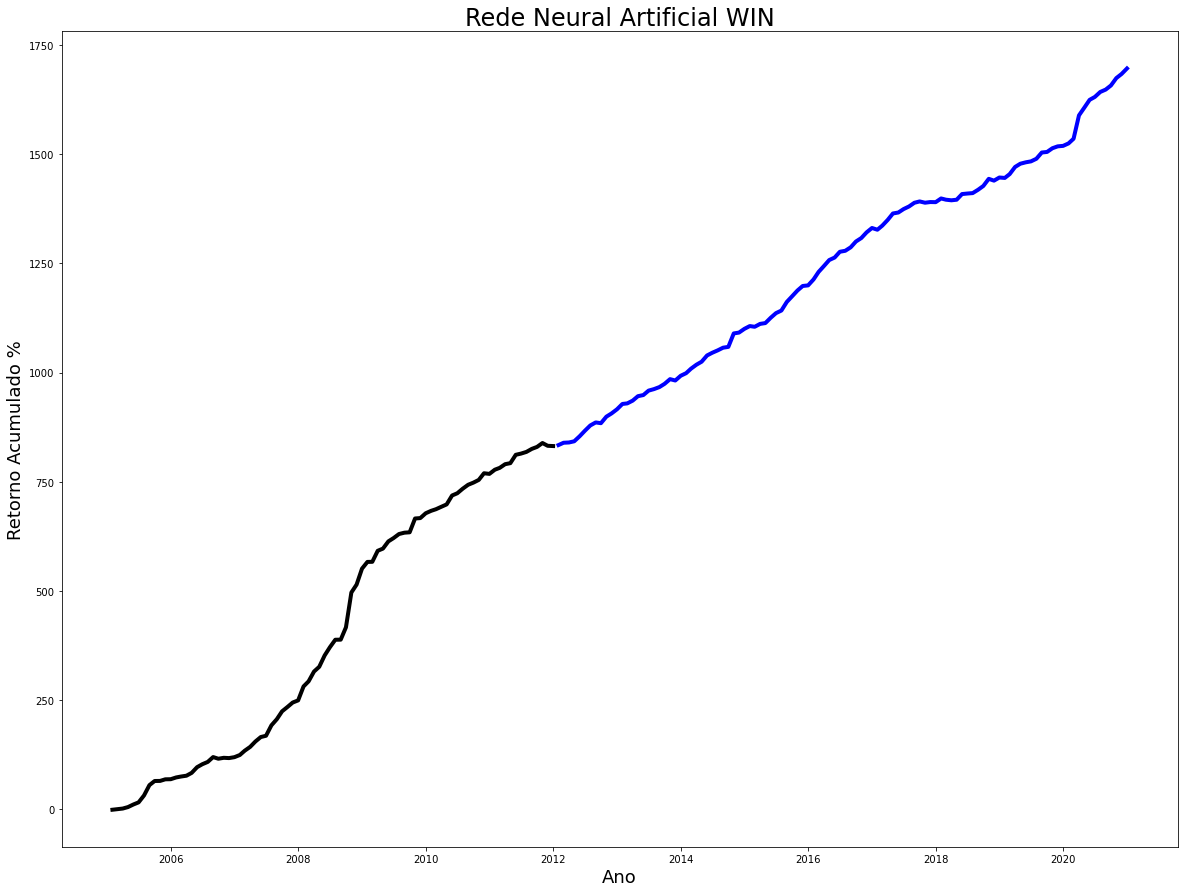

In [34]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["TrainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("Rede Neural Artificial WIN", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg.groupby((bAgreg["TrainTest"].shift() * bAgreg["TrainTest"] < 0).cumsum()).apply(grafico)